In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [2]:
# Load the weather history dataset
df = pd.read_csv("C:/Users/vpras/OneDrive/Desktop/Sixth Sem/ML/TechIntern/Task3/weatherHistory.csv")

# Extract the feature and target variables
X = df.iloc[:, 3:-1].values # Features: Temperature, Apparent Temperature, Humidity, Wind Speed, Wind Bearing, Visibility, Loud Cover, Pressure
y = df.iloc[:, 1].values # Target: Summary

# Encode the target variable using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Define the ANN model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_dim=X_train.shape[1], activation="relu"),
  tf.keras.layers.Dense(64, activation="relu"),
  tf.keras.layers.Dense(len(le.classes_), activation="softmax")
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/50
2412/2412 [==============================] - 11s 4ms/step - loss: 2.8361 - accuracy: 0.3423
Epoch 2/50
2412/2412 [==============================] - 8s 3ms/step - loss: 1.6546 - accuracy: 0.3902
Epoch 3/50
2412/2412 [==============================] - 8s 3ms/step - loss: 1.4245 - accuracy: 0.4117
Epoch 4/50
2412/2412 [==============================] - 8s 3ms/step - loss: 1.2974 - accuracy: 0.4325
Epoch 5/50
2412/2412 [==============================] - 8s 3ms/step - loss: 1.2212 - accuracy: 0.4553
Epoch 6/50
2412/2412 [==============================] - 8s 3ms/step - loss: 1.2109 - accuracy: 0.4595
Epoch 7/50
2412/2412 [==============================] - 9s 4ms/step - loss: 1.1927 - accuracy: 0.4653
Epoch 8/50
2412/2412 [==============================] - 9s 4ms/step - loss: 1.1830 - accuracy: 0.4708
Epoch 9/50
2412/2412 [==============================] - 8s 3ms/step - loss: 1.1744 - accuracy: 0.4744
Epoch 10/50
2412/2412 [==============================] - 8s 3ms/step - loss: 1.16

603/603 [==============================] - 2s 2ms/step


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


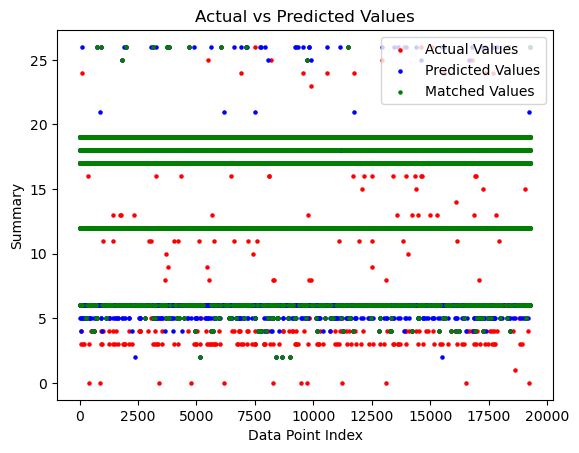

In [10]:
# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Reset the index of y_test DataFrame
y_test_df = pd.DataFrame(y_test, columns=["Summary"])
y_test_df = y_test_df.reset_index(drop=True)

# Create arrays to store x and y values for actual and predicted values
x_actual = []
y_actual = []
x_predicted = []
y_predicted = []

# Loop through each row of y_test
for i, row in y_test_df.iterrows():
    # Store x and y values for actual and predicted values
    x_actual.append(i)
    y_actual.append(row["Summary"])
    x_predicted.append(i)
    y_predicted.append(y_pred_classes[i])

# Create scatter plot for actual values with red dots
plt.scatter(x_actual, y_actual, c='r', label='Actual Values', s=5)
# Create scatter plot for predicted values with blue dots
plt.scatter(x_predicted, y_predicted, c='b', label='Predicted Values', s=5)
# Create scatter plot for matched values with green dots
for i in range(len(y_actual)):
    if y_actual[i] == y_predicted[i]:
        plt.scatter(x_actual[i], y_actual[i], c='g', label='Matched Values', s=5)

# Add a legend with the three labels in the desired order
plt.legend(labels=['Actual Values', 'Predicted Values', 'Matched Values'])
plt.xlabel('Data Point Index')
plt.ylabel('Summary')
plt.title('Actual vs Predicted Values')

# Show the plot
plt.show()